**一、准备数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

dftrain_raw = pd.read_csv("https://raw.githubusercontent.com/lyhue1991/eat_tensorflow2_in_30_days/master/data/titanic/train.csv")
dftest_raw = pd.read_csv("https://raw.githubusercontent.com/lyhue1991/eat_tensorflow2_in_30_days/master/data/titanic/test.csv")
dftrain_raw.head(10)

PassengerId  Survived  Pclass  \
0          493         0       1   
1           53         1       1   
2          388         1       2   
3          192         0       2   
4          687         0       3   
5           16         1       2   
6          228         0       3   
7          884         0       2   
8          168         0       3   
9          752         1       3   

                                              Name     Sex   Age  SibSp  \
0                       Molson, Mr. Harry Markland    male  55.0      0   
1         Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
2                                 Buss, Miss. Kate  female  36.0      0   
3                            Carbines, Mr. William    male  19.0      0   
4                         Panula, Mr. Jaako Arnold    male  14.0      4   
5                 Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
6                  Lovell, Mr. John Hall ("Henry")    male  20.5      0   
7                    Banfield, Mr. Frederick James    male  28.0      0   
8  Skoog, Mrs. William (Anna Bernhardina Karlsson)  female  45.0      1   
9                              Moor, Master. Meier    male   6.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0            113787  30.5000   C30        S  
1      0          PC 17572  76.7292   D33        C  
2      0             27849  13.0000   NaN        S  
3      0             28424  13.0000   NaN        S  
4      1           3101295  39.6875   NaN        S  
5      0            248706  16.0000   NaN        S  
6      0         A/5 21173   7.2500   NaN        S  
7      0  C.A./SOTON 34068  10.5000   NaN        S  
8      4            347088  27.9000   NaN        S  
9      1            392096  12.4750  E121        S

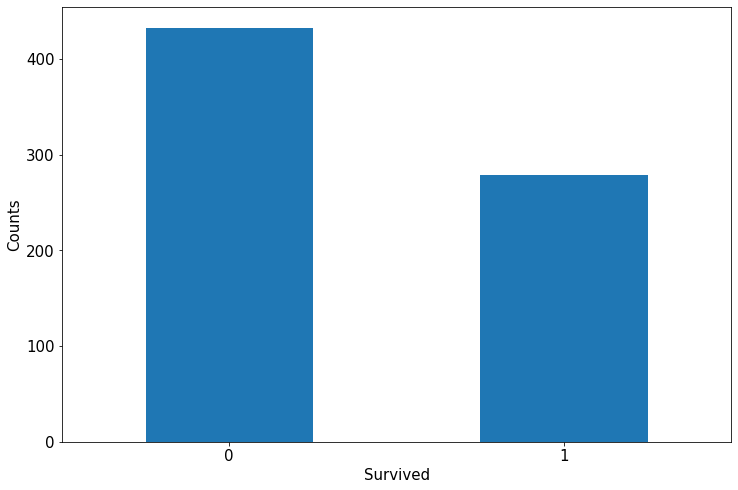

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12, 8), fontsize=15, rot = 0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()

年龄分布情况

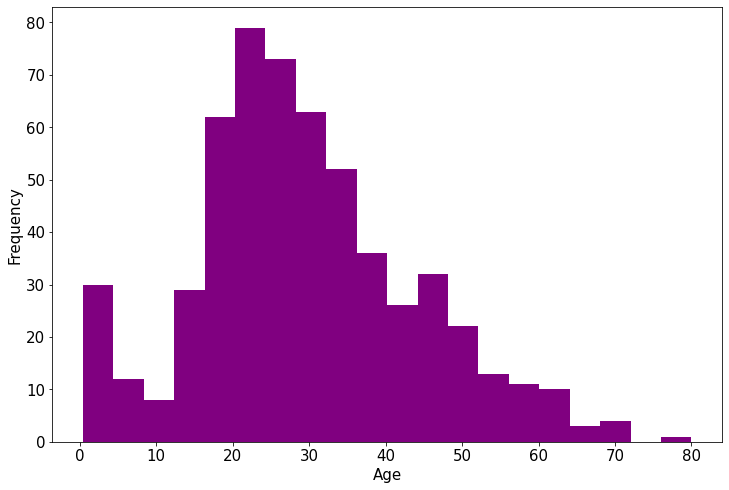

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind='hist', bins = 20, color = 'purple',
                             figsize=(12, 8), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

年龄和 label 的相关性

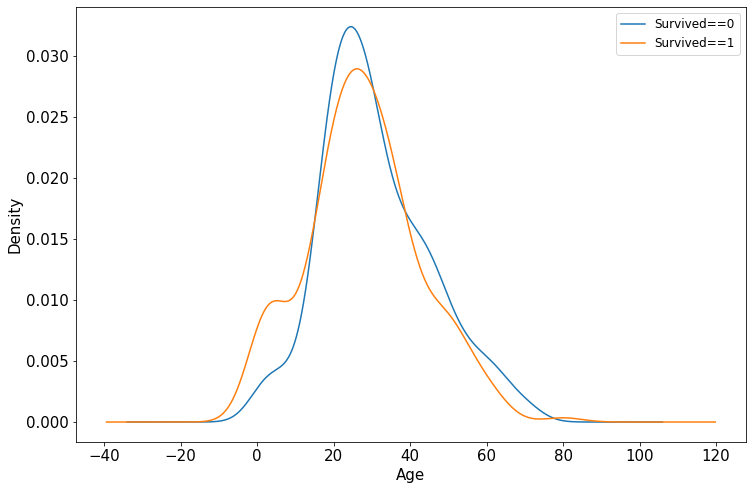

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind='density',
                        figsize = (12, 8), fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind='density',
                        figsize = (12, 8), fontsize=15)
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

下面为正式的数据预处理

In [5]:
def preprocessing(dfdata):
    dfresult = pd.DataFrame()

    # Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, dfPclass], axis = 1)

    # Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex], axis=1)

    # Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    # SibSp, Parch, Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    # Carbin
    dfresult['Carbin_null'] = pd.isna(dfdata['Cabin']).astype('int32')

    # Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)


二、定义模型

In [6]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


三、训练模型

In [7]:
# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2#分割一部分训练数据用于验证
                    )

Epoch 1/30
9/9 [==============================] - 2s 68ms/step - loss: 0.9609 - auc: 0.6726 - val_loss: 0.9074 - val_auc: 0.6304
Epoch 2/30
9/9 [==============================] - 0s 10ms/step - loss: 0.7346 - auc: 0.6437 - val_loss: 0.7957 - val_auc: 0.5632
Epoch 3/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6979 - auc: 0.6130 - val_loss: 0.7107 - val_auc: 0.6242
Epoch 4/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6675 - auc: 0.6600 - val_loss: 0.7092 - val_auc: 0.6202
Epoch 5/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6535 - auc: 0.6657 - val_loss: 0.7034 - val_auc: 0.6239
Epoch 6/30
9/9 [==============================] - 0s 12ms/step - loss: 0.6462 - auc: 0.6704 - val_loss: 0.6969 - val_auc: 0.6280
Epoch 7/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6360 - auc: 0.6758 - val_loss: 0.6752 - val_auc: 0.6331
Epoch 8/30
9/9 [==============================] - 0s 10ms/step - loss: 0.6382 - auc: 0.6728 - val

**四、评估模型**

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

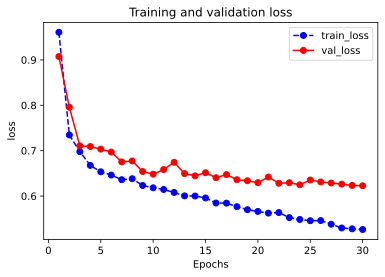

In [9]:
plot_metric(history,"loss")

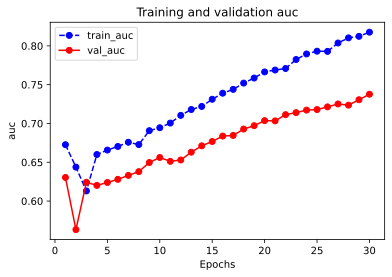

In [10]:
plot_metric(history,'auc')

In [11]:
model.evaluate(x = x_test,y = y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5270 - auc: 0.8017


[0.5269752740859985, 0.8016557693481445]

**五、使用模型**

In [12]:
#预测概率
model.predict(x_test[0:10])
#model(tf.constant(x_test[0:10].values,dtype = tf.float32)) #等价写法

array([[0.20811096],
       [0.41773006],
       [0.5181996 ],
       [0.8552934 ],
       [0.43584654],
       [0.46673524],
       [0.36200267],
       [0.58508223],
       [0.5381098 ],
       [0.19129288]], dtype=float32)

In [13]:
#预测类别
np.argmax(model.predict(x_test[0:10]), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

六、保存模型

In [14]:
# Keras 方式保存
model.save('./data/keras_model.h5')

del model # 删除现有模型

# indentical to the previous one
model = models.load_model('./data/keras_model.h5')
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5270 - auc: 0.8017


[0.5269752740859985, 0.8016557693481445]

In [15]:
# 保存模型结构
json_str = model.to_json()

# 恢复模型结构
model_json = models.model_from_json(json_str)

In [16]:
# 保存模型权重
model.save_weights('./data/keras_model_weight.h5')

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

# 加载权重
model_json.load_weights('./data/keras_model_weight.h5')
model_json.evaluate(x_test,y_test)

6/6 [==============================] - 2s 5ms/step - loss: 0.5270 - auc: 0.8017


[0.5269752740859985, 0.8016557693481445]

In [18]:
# Tensorflow 原生方式保存
# 保存权重，该方式仅仅保存权重张量
model.save_weights('./data/tf_model_weights.ckpt',save_format = "tf")

# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署

model.save('./data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('./data/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)

INFO:tensorflow:Assets written to: ./data/tf_model_savedmodel/assets
export saved model.
6/6 [==============================] - 0s 3ms/step - loss: 0.5270 - auc: 0.8017


[0.5269752740859985, 0.8016557693481445]